# Visual Python Project #1, 2014550025, Sang-Woo Lee

In [14]:
## importing
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
from pybinding.repository import graphene

pb.pltutils.use_style()
%matplotlib inline

plt.rcParams.update({'font.size':16, 'font.family':'serif', 'figure.figsize':[16,9]})

# Part-(a): Investigate edge effect through nanoribbon model

Purpose: Which edge is better for value of DOS at 0 energy?

## Zigzag edge

Text(0.5, 1.0, 'Model system')

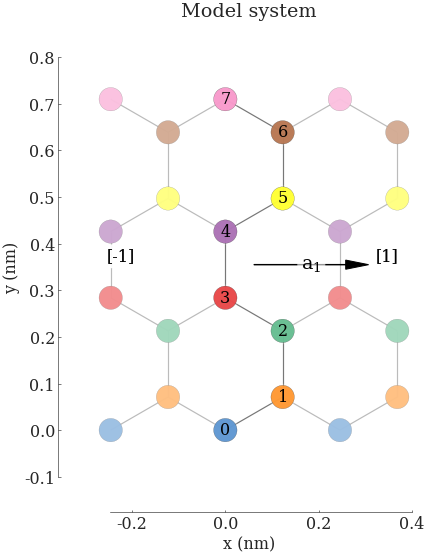

In [15]:
#make lattice for the model
def zigzag_nanoribbon():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[d*sqrt(3), 0])
    lat.add_sublattices(('0', [0, 0]),
                        ('1', [d*sqrt(3)/2,  d/2]),
                        ('2', [d*sqrt(3)/2,  d*3/2]),
                        ('3', [0,  d*2]),
                        ('4', [0,  d*3]),
                        ('5', [d*sqrt(3)/2,  d*7/2]),
                        ('6', [d*sqrt(3)/2,  d*9/2]),
                        ('7', [0,  d*5])
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        ([0,  0], '4', '5', t),
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        # between neighboring cells
        ([-1, 0], '0', '1', t),
        ([1, 0], '2', '3', t),
        ([-1, 0], '4', '5', t),
        ([1, 0], '6', '7', t)
    )
    return lat

lattice = zigzag_nanoribbon()
lattice.plot()
plt.title('Model system')

Value of dos at 0 energy 1.7422411608371775


Text(0.5, 1.0, 'LDOS')

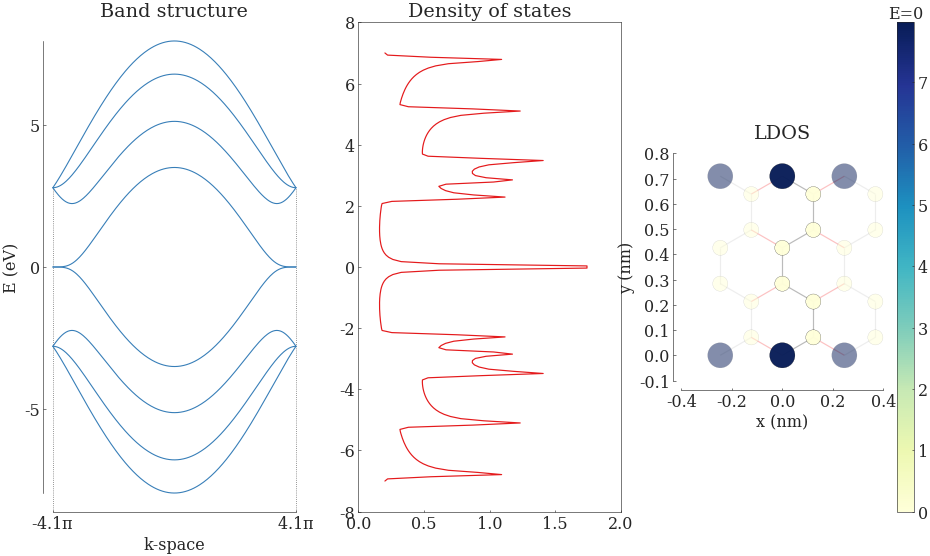

In [16]:
#set up the model
model = pb.Model(
    zigzag_nanoribbon(),
    pb.translational_symmetry(a1=True, a2= False)
)
solver = pb.solver.lapack(model)

#Band structure
plt.subplot(131)
bands = solver.calc_bands(-pi/graphene.a, pi/graphene.a) #in the first Brillouin zone
bands.plot()
plt.title('Band structure')

#Average density of states
kx=np.linspace(-pi/(graphene.a), pi/(graphene.a),200)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],0])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
data1=data1/200
plt.subplot(132)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])

#Local density of states
plt.subplot(133)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

## Armchair edge

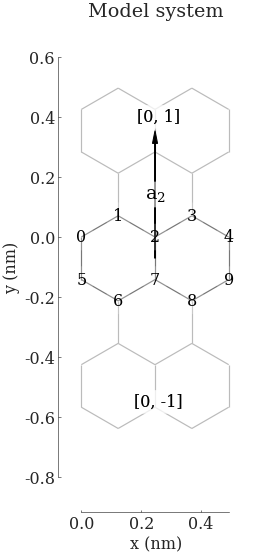

In [17]:
#make lattice for the model
def armchair_nanoribbon():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[0,0], a2=[0, d*3])
    lat.add_sublattices(('0', [0*d*sqrt(3)/2, 0]),
                        ('1', [1*d*sqrt(3)/2,  d/2]),
                        ('2', [2*d*sqrt(3)/2, 0]),
                        ('3', [3*d*sqrt(3)/2,  d/2]),
                        ('4', [4*d*sqrt(3)/2,  0]),
                        ('5', [0*d*sqrt(3)/2, -d]),
                        ('6', [1*d*sqrt(3)/2,  -d*3/2]),
                        ('7', [2*d*sqrt(3)/2, -d]),
                        ('8', [3*d*sqrt(3)/2,  -d*3/2]),
                        ('9', [4*d*sqrt(3)/2,  -d])                        
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        ([0,  0], '7', '8', t),
        ([0,  0], '8', '9', t),
        
        ([0,  0], '0', '5', t),
        ([0,  0], '2', '7', t),
        ([0,  0], '4', '9', t),
        # between neighboring cells
        ([0, 1], '1', '6', t),
        ([0, 1], '3', '8', t)
    )
    return lat

lattice = armchair_nanoribbon()
lattice.plot()
plt.title('Model system')
plt.show()

Value of dos at 0 energy 0.28853516506295024


Text(0.5, 1.0, 'LDOS')

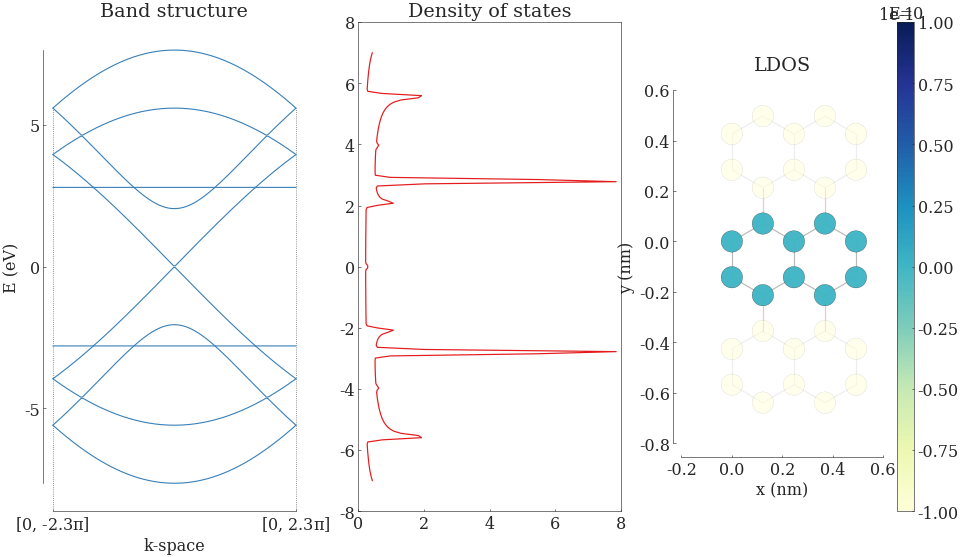

In [18]:
#set up the model
model = pb.Model(
    armchair_nanoribbon(),
    pb.translational_symmetry(a1=False, a2= True)
)
solver = pb.solver.lapack(model)

#Band structure
plt.subplot(131)
k1=[0,-pi/(3*graphene.a/sqrt(3))]
k2=[0, pi/(3*graphene.a/sqrt(3))]
bands = solver.calc_bands(k1,k2) #in the first Brillouin zone
bands.plot()
plt.title('Band structure')

#Average density of states
ky=np.linspace(-pi/(3*graphene.a/sqrt(3)), pi/(3*graphene.a/sqrt(3)),200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([0,ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
data1=data1/200
plt.subplot(132)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])

#Local density of states
plt.subplot(133)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

## Conclusion of (a) :

The zigzag edge bring larger value of DOS at 0 energy than the armchair edge!

# Part-(b): DOS for graphene sheet through unit cell model.

Purpose: Which model is better for value of DOS at 0 energy?

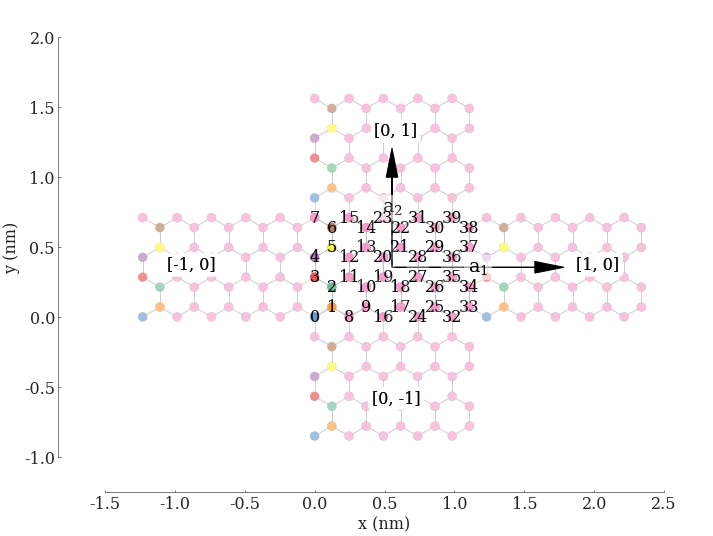

In [19]:
def graphene_sheet():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping
    
    lat = pb.Lattice(a1=[d*5*sqrt(3), 0],a2=[0, 6*d])
    lat.add_sublattices(('0', [0, 0]),
                        ('1', [d*sqrt(3)/2,  d/2]),
                        ('2', [d*sqrt(3)/2,  d*3/2]),
                        ('3', [0,  d*2]),
                        ('4', [0,  d*3]),
                        ('5', [d*sqrt(3)/2,  d*7/2]),
                        ('6', [d*sqrt(3)/2,  d*9/2]),
                        ('7', [0,  d*5]),
                        
                        ('8', [d*sqrt(3), 0]),
                        ('9', [d*3*sqrt(3)/2,  d/2]),
                        ('10', [d*3*sqrt(3)/2,  d*3/2]),
                        ('11', [d*sqrt(3),  d*2]),
                        ('12', [d*sqrt(3),  d*3]),
                        ('13', [d*3*sqrt(3)/2,  d*7/2]),
                        ('14', [d*3*sqrt(3)/2,  d*9/2]),
                        ('15', [d*sqrt(3),  d*5]),
                        
                        ('16', [d*2*sqrt(3), 0]),
                        ('17', [d*5*sqrt(3)/2,  d/2]),
                        ('18', [d*5*sqrt(3)/2,  d*3/2]),
                        ('19', [d*2*sqrt(3),  d*2]),
                        ('20', [d*2*sqrt(3),  d*3]),
                        ('21', [d*5*sqrt(3)/2,  d*7/2]),
                        ('22', [d*5*sqrt(3)/2,  d*9/2]),
                        ('23', [d*2*sqrt(3),  d*5]),
                        
                        ('24', [d*3*sqrt(3), 0]),
                        ('25', [d*7*sqrt(3)/2,  d/2]),
                        ('26', [d*7*sqrt(3)/2,  d*3/2]),
                        ('27', [d*3*sqrt(3),  d*2]),
                        ('28', [d*3*sqrt(3),  d*3]),
                        ('29', [d*7*sqrt(3)/2,  d*7/2]),
                        ('30', [d*7*sqrt(3)/2,  d*9/2]),
                        ('31', [d*3*sqrt(3),  d*5]),
                        
                        ('32', [d*4*sqrt(3), 0]),
                        ('33', [d*9*sqrt(3)/2,  d/2]),
                        ('34', [d*9*sqrt(3)/2,  d*3/2]),
                        ('35', [d*4*sqrt(3),  d*2]),
                        ('36', [d*4*sqrt(3),  d*3]),
                        ('37', [d*9*sqrt(3)/2,  d*7/2]),
                        ('38', [d*9*sqrt(3)/2,  d*9/2]),
                        ('39', [d*4*sqrt(3),  d*5])
                       )
    lat.register_hopping_energies({'u':t})
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        ([0,  0], '4', '5', t),
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        
        ([0,  0], '8', '9', t),
        ([0,  0], '9', '10', t),
        ([0,  0], '10', '11', t),
        ([0,  0], '11', '12', t),
        ([0,  0], '12', '13', t),
        ([0,  0], '13', '14', t),
        ([0,  0], '14', '15', t),
        
        ([0,  0], '16', '17', t),
        ([0,  0], '17', '18', t),
        ([0,  0], '18', '19', 'u'),
        ([0,  0], '19', '20', 'u'),
        ([0,  0], '20', '21', t),
        ([0,  0], '21', '22', t),
        ([0,  0], '22', '23', t),
        
        ([0,  0], '24', '25', t),
        ([0,  0], '25', '26', t),
        ([0,  0], '26', '27', t),
        ([0,  0], '27', '28', t),
        ([0,  0], '28', '29', t),
        ([0,  0], '29', '30', t),
        ([0,  0], '30', '31', t),
        
        ([0,  0], '32', '33', t),
        ([0,  0], '33', '34', t),
        ([0,  0], '34', '35', t),
        ([0,  0], '35', '36', t),
        ([0,  0], '36', '37', t),
        ([0,  0], '37', '38', t),
        ([0,  0], '38', '39', t),
        
        ([0,  0], '1', '8', t),
        ([0,  0], '2', '11', t),
        ([0,  0], '5', '12', t),
        ([0,  0], '6', '15', t),
        
        ([0,  0], '9', '16', t),
        ([0,  0], '10', '19', 'u'),
        ([0,  0], '13', '20', t),
        ([0,  0], '14', '23', t),
        
        ([0,  0], '17', '24', t),
        ([0,  0], '18', '27', t),
        ([0,  0], '21', '28', t),
        ([0,  0], '22', '31', t),
        
        ([0,  0], '25', '32', t),
        ([0,  0], '26', '35', t),
        ([0,  0], '29', '36', t),
        ([0,  0], '30', '39', t),
        # between neighboring cells
        ([-1, 0], '0', '33', t),
        ([-1, 0], '3', '34', t),
        ([-1, 0], '4', '37', t),
        ([-1, 0], '7', '38', t),
        
        ([0, -1], '0', '7', t),
        ([0, -1], '8', '15', t),
        ([0, -1], '16', '23', t),
        ([0, -1], '24', '31', t),
        ([0, -1], '32', '39', t)
    )
    return lat

lattice = graphene_sheet()
lattice.plot()
plt.show()

Value of dos at 0 energy 8.829815120240424e-54


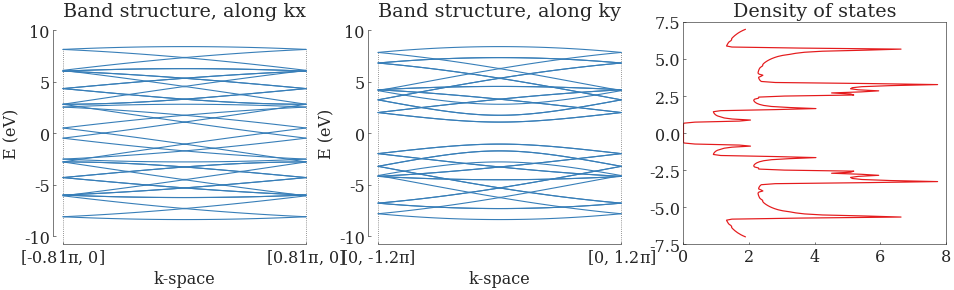

(-1, 1)

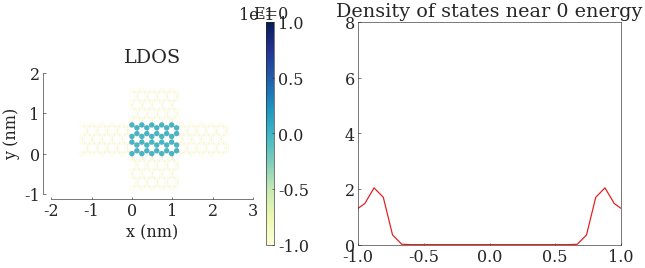

In [28]:
#set up the model
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True)
)
solver = pb.solver.lapack(model)

#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

Graphene sheet has computationally 0 value of DOS at E=0.

Therefore, how do we make the value of DOS at E=0?

## Addtion an hydrogen atom on the specific site in unit cell.

Text(0.5, 1.0, 'Model system')

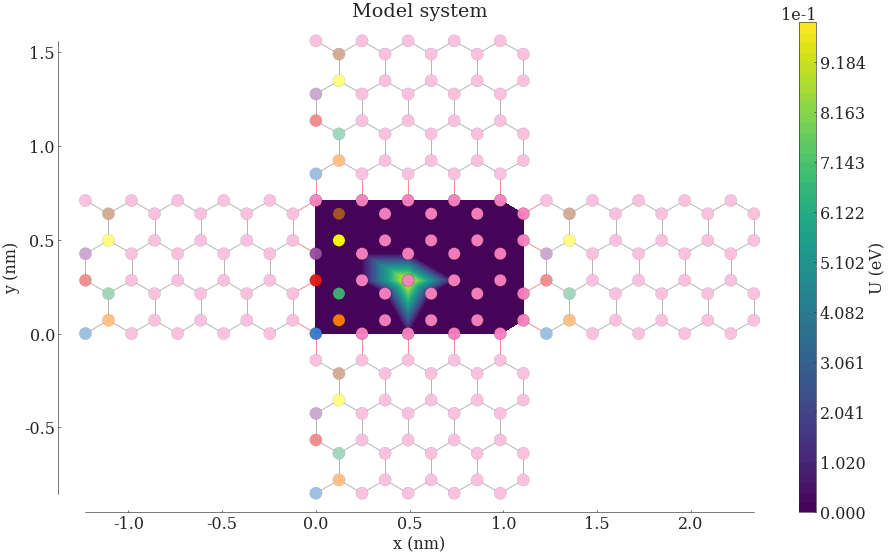

In [29]:
def addatom(delta_energy):
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == '19'] += delta_energy
        return energy
    return potential

model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    addatom(1)
)

model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model.plot()
plt.title('Model system')

Value of dos at 0 energy 5.832706209386134e-57


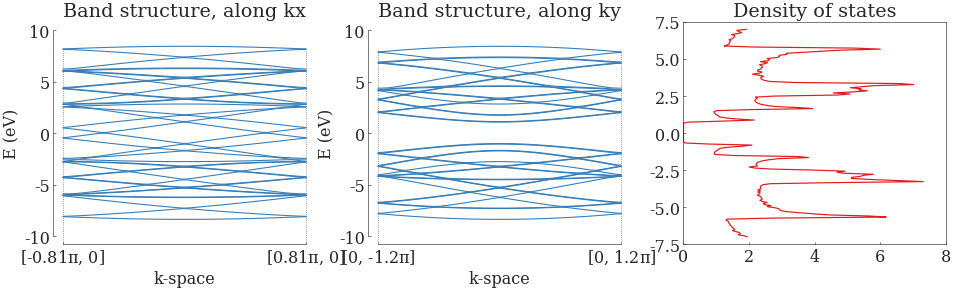

(-1, 1)

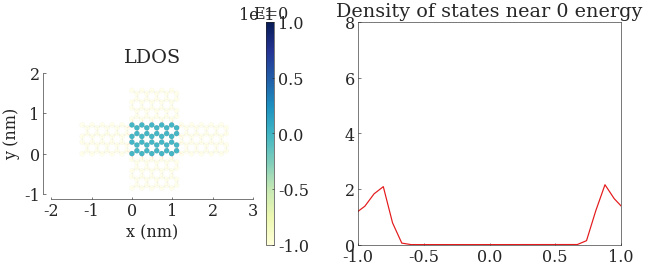

In [33]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

By adding an hydrogen atom, the value is not changed well, in fact.

## Substitution atom in unit cell by nitrogen atom

Text(0.5, 1.0, 'Model system')

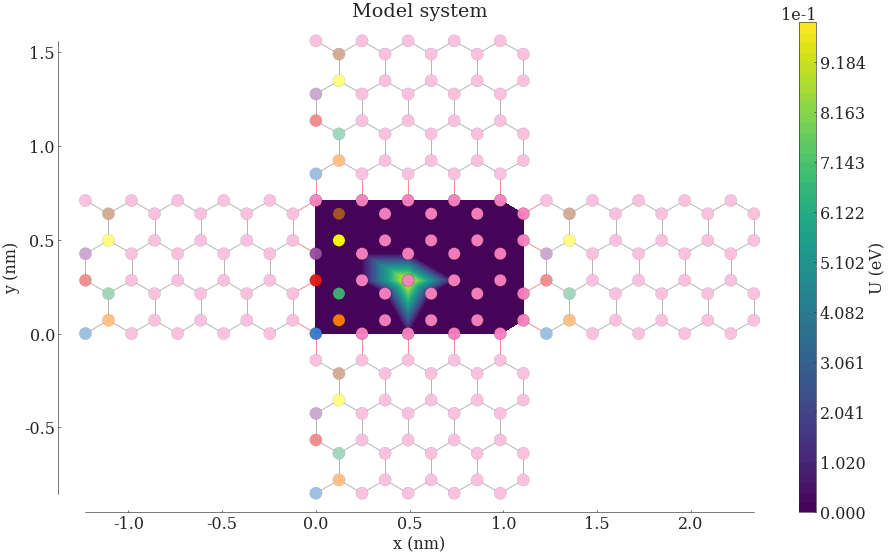

In [34]:
def substitute(delta_energy, fix_hopping):
    @pb.onsite_energy_modifier
    def potential(energy, sub_id):
        energy[sub_id == '19'] += delta_energy
        return energy
    @pb.hopping_energy_modifier
    def hopping(energy, hop_id):
        energy[hop_id == '19'] *= fix_hopping
        return energy
    return potential, hopping

model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    substitute(1,6/7) #approximately, decrease by 1/7.(charge ratio)
)

model.onsite_map.plot_contourf()
pb.pltutils.colorbar(label="U (eV)")
model.plot()
plt.title('Model system')

Value of dos at 0 energy 5.832706209386134e-57


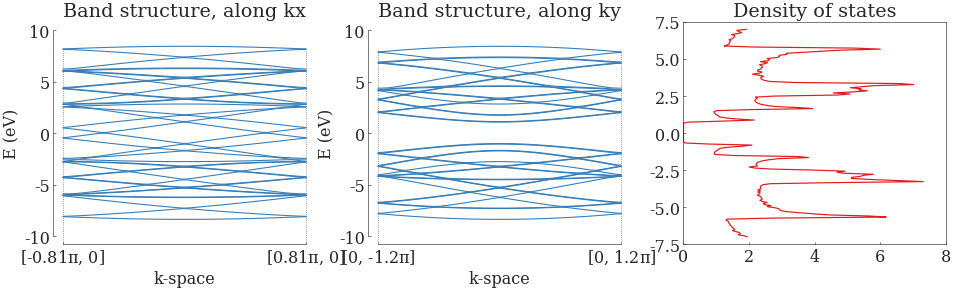

(-1, 1)

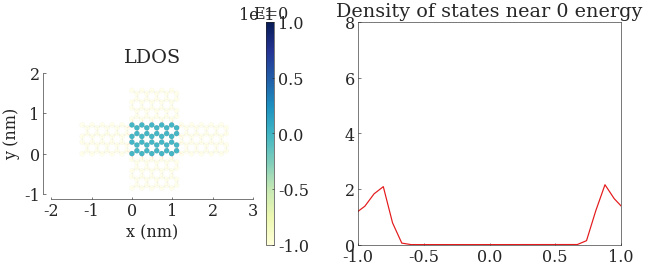

In [35]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

By substituting by nitrogen atom, the value is also not changed well, in fact.

## Make a vacancy

Text(0.5, 1.0, 'Model system')

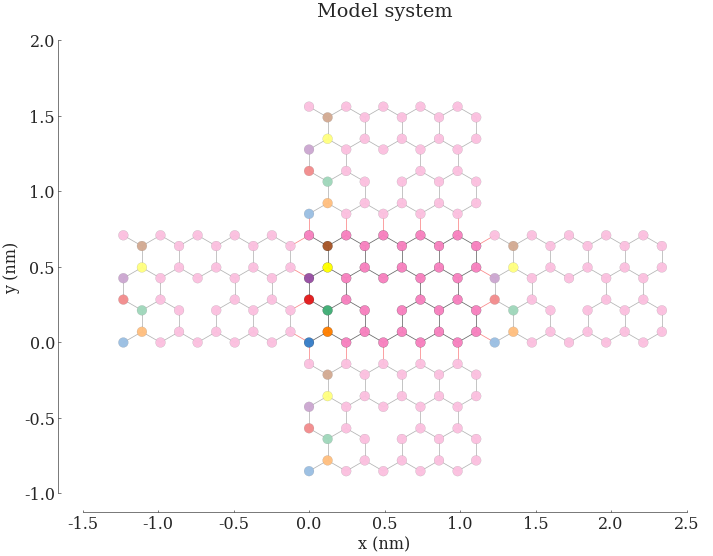

In [36]:
def vacancy(atom):
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id==atom] = False
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    vacancy('19')
)

model.plot()
plt.title('Model system')

Value of dos at 0 energy 6.245272217194619


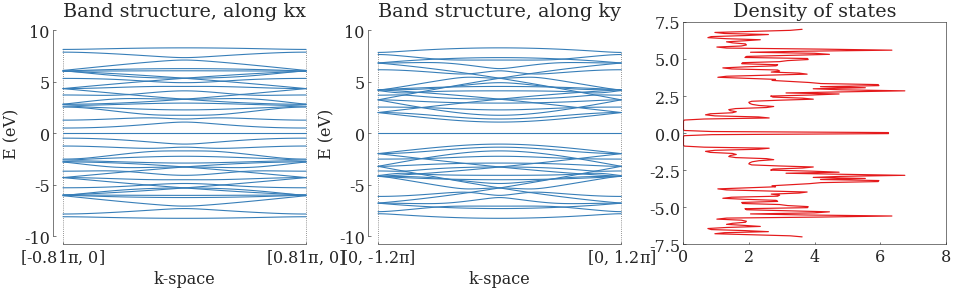

(-1, 1)

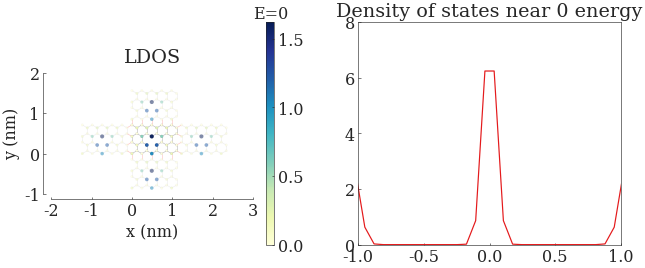

In [37]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

By making a vacancy, the value is changed significantly.

How about other positional vacancy?

Text(0.5, 1.0, 'Model system')

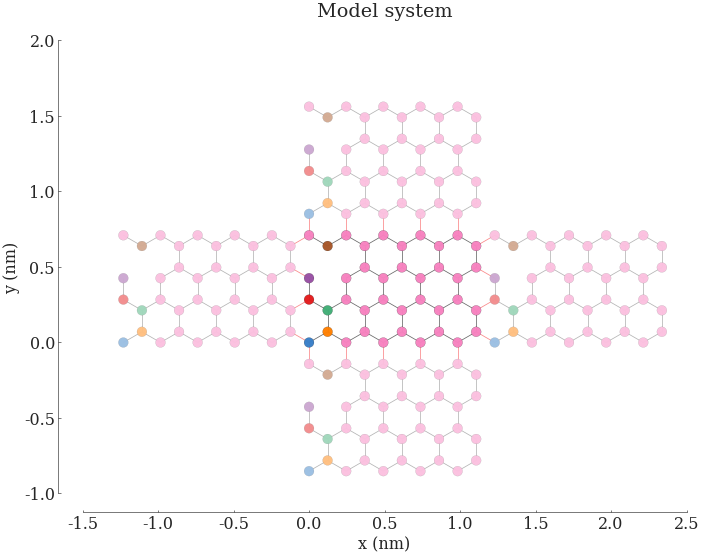

In [38]:
def vacancy(atom):
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id==atom] = False
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    vacancy('5')
)

model.plot()
plt.title('Model system')

Value of dos at 0 energy 6.245279740422203


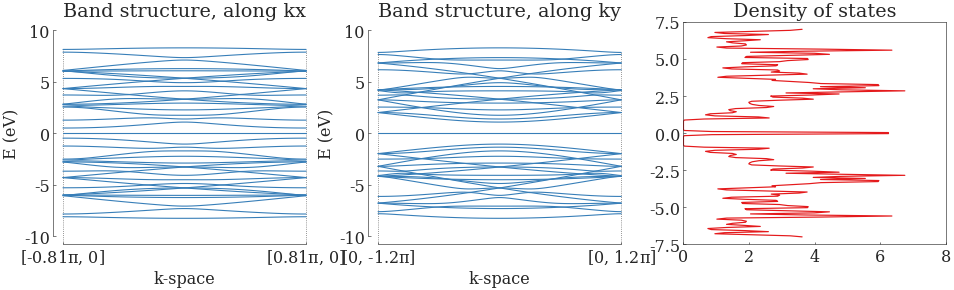

(-1, 1)

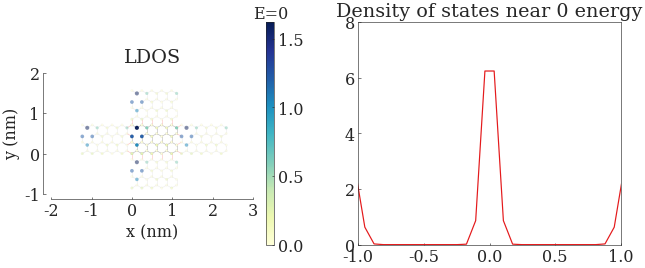

In [39]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

For making one vacancy, the specific site does not matter.

(0, 40)

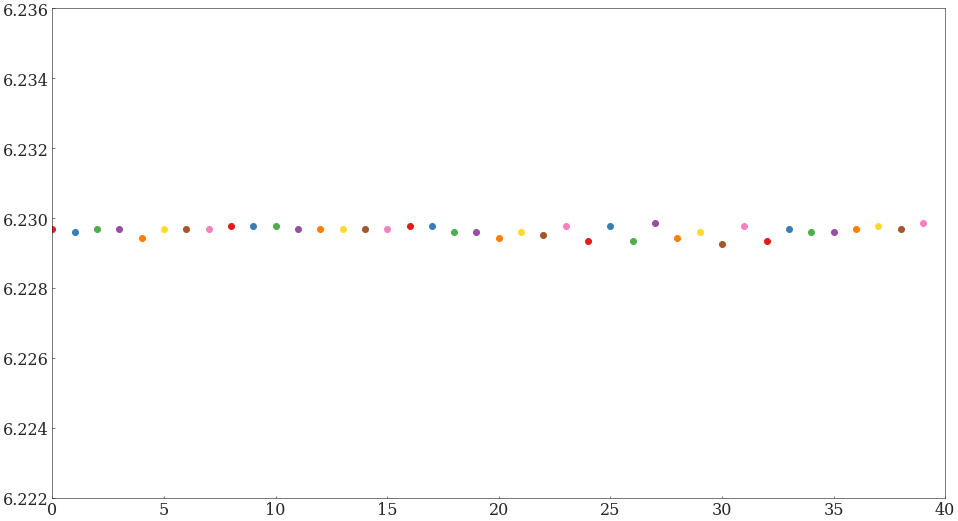

In [43]:
#comparision
fig = plt.figure()
ax = fig.add_subplot(111)

points={}

for i in range(40):
    atom_id_1=str(i)
    def double_vacancy():
        @pb.site_state_modifier
        def modifier(state, sub_id):
            state[sub_id==atom_id_1] = False
            return state
        return modifier
    model = pb.Model(
        graphene_sheet(),
        pb.translational_symmetry(a1=True, a2= True),
        double_vacancy()
    )
    solver = pb.solver.lapack(model)
    dos = solver.calc_dos(energies=np.linspace(-7, 7, 200), broadening=0.05)  # [eV]
    ax.scatter(i, dos.data[100])
    points[i]=dos.data[100]    
plt.xlim(0,40)

For making only one vacancy, the specific site does not matter.

## Make hexaon vacancy

Text(0.5, 1.0, 'Model system')

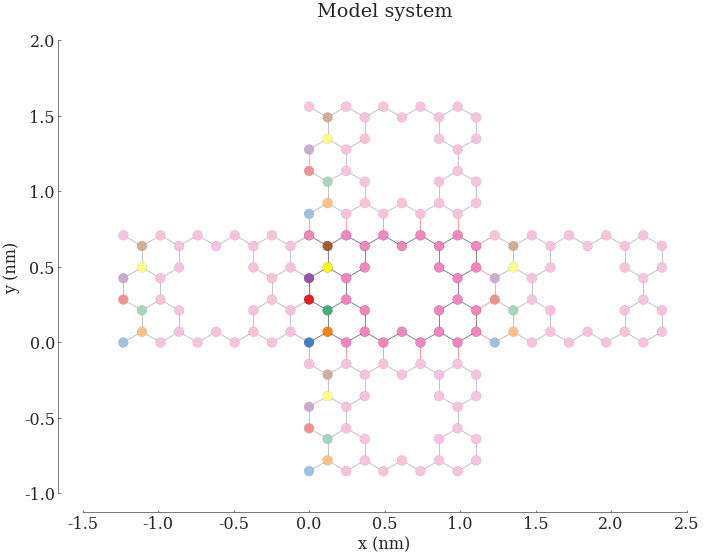

In [44]:
def hexagon_vacancy():
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id=='19'] = False
        state[sub_id=='20'] = False
        state[sub_id=='21'] = False
        state[sub_id=='28'] = False
        state[sub_id=='27'] = False
        state[sub_id=='18'] = False
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    hexagon_vacancy()
)

model.plot()
plt.title('Model system')

Value of dos at 0 energy 1.1915947780211126e-28


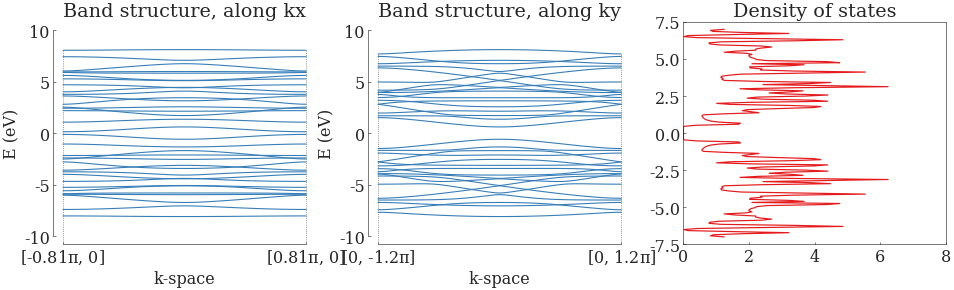

(-1, 1)

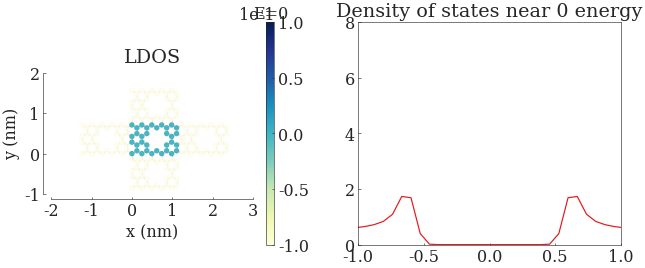

In [45]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

More defects are not always better, generally.

## Make double vacancy

Text(0.5, 1.0, 'Model system')

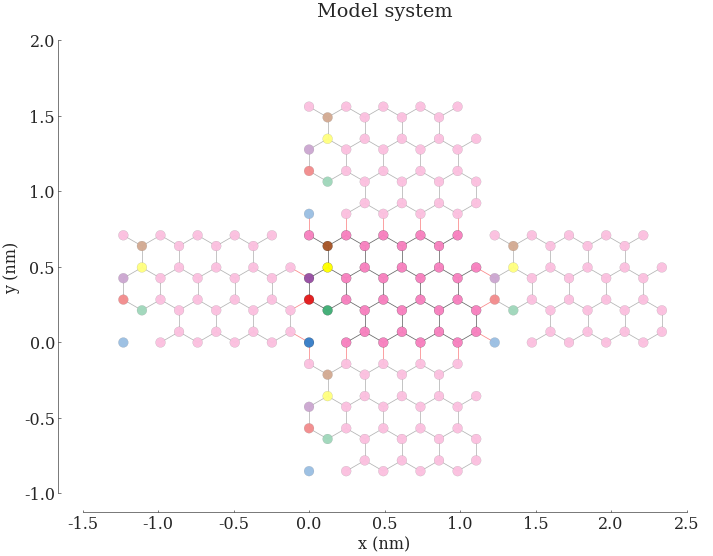

In [46]:
def double_vacancy():
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id=='1'] = False
        state[sub_id=='38'] = False
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    double_vacancy()
)

model.plot()
plt.title('Model system')

Value of dos at 0 energy 1.637639311060201


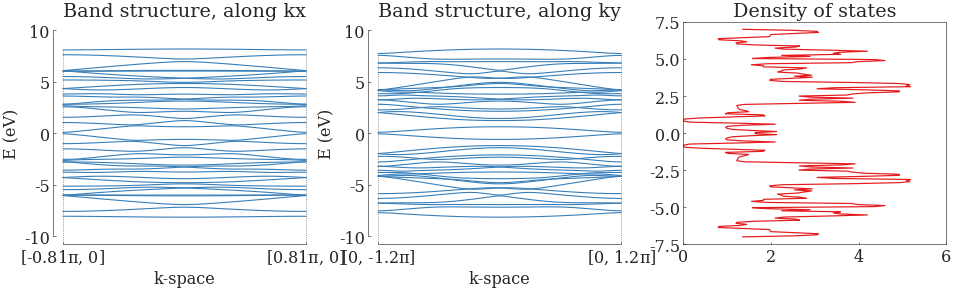

(-1, 1)

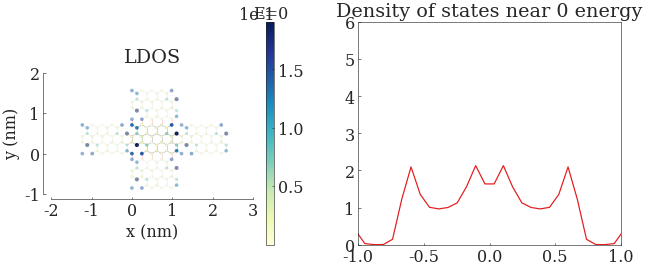

In [47]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

Text(0.5, 1.0, 'Model system')

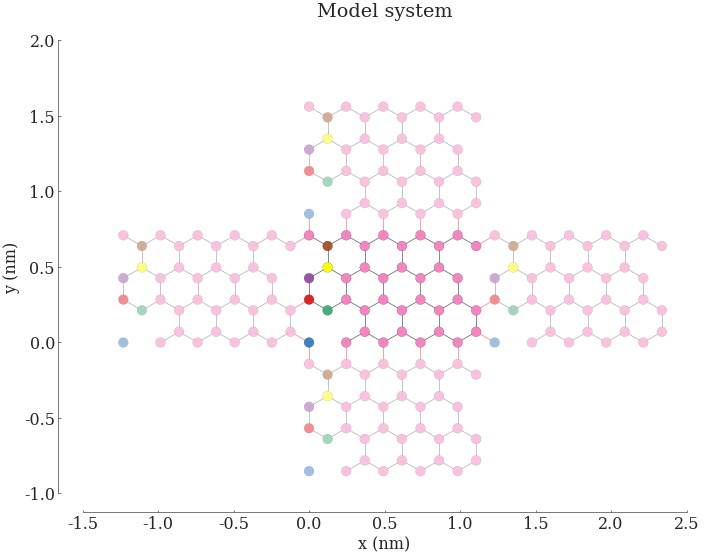

In [48]:
def double_vacancy():
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id=='1'] = False
        state[sub_id=='37'] = False
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    double_vacancy()
)

model.plot()
plt.title('Model system')

Value of dos at 0 energy 12.490668776549235


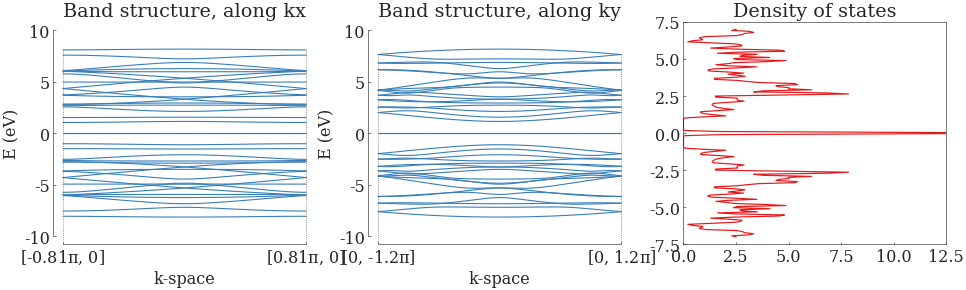

(-1, 1)

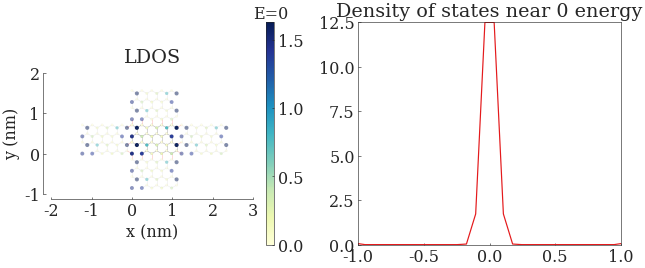

In [50]:
solver = pb.solver.lapack(model)
#Band structure
cellsizex=5*graphene.a
cellsizey=6*graphene.a/sqrt(3)
kx1=[-pi/cellsizex,0]
kx2=[ pi/cellsizex,0]
ky1=[0,-pi/cellsizey]
ky2=[0, pi/cellsizey]

plt.subplot(231)
bands = solver.calc_bands(kx1,kx2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along kx')

plt.subplot(232)
bands = solver.calc_bands(ky1,ky2) #in the first Brillouin zone of kx
bands.plot()
plt.title('Band structure, along ky')

#Average density of states
kx=np.linspace(-pi/cellsizex, pi/cellsizex,200)
ky=np.linspace(-pi/cellsizey, pi/cellsizey,200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],-ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data    
data1=data1/400
plt.subplot(233)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
plt.show()

#Local density of states
plt.subplot(234)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')

plt.subplot(235)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data1)
plt.xlim(-1, 1)

In case of double defects, even if the selection is slightly different, a huge difference is obtained!

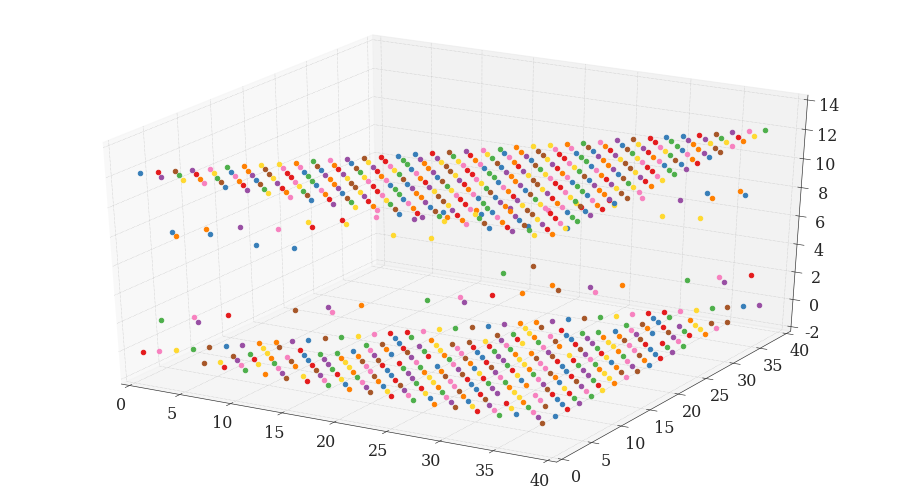

In [51]:
from mpl_toolkits.mplot3d import Axes3D
#comparision
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points={}

for j in range(40):
    atom_id_1=str(j)
    for i in range(j+1,40):
        atom_id_2=str(i)
        def double_vacancy():
            @pb.site_state_modifier
            def modifier(state, sub_id):
                state[sub_id==atom_id_1] = False
                state[sub_id==atom_id_2] = False
                return state
            return modifier
        model = pb.Model(
            graphene_sheet(),
            pb.translational_symmetry(a1=True, a2= True),
            double_vacancy()
        )
        solver = pb.solver.lapack(model)
        dos = solver.calc_dos(energies=np.linspace(-7, 7, 200), broadening=0.05)  # [eV]
        ax.scatter(i, j, dos.data[100])
        points[(i,j)]=dos.data[100]

In [52]:
class1={} #the value>12
class2={} #1<the value<12
class3={} #the value<1
for point, val in list(points.items()):
    if val>12:
        class1[point]=val
    elif val>1:
        class2[point]=val
    else:
        class3[point]=val
print('The total number of points is',len(points))
print('length of class1 is',len(class1))
print('length of class1 is',len(class2))
print('length of class1 is',len(class3))

The total number of points is 780
length of class1 is 380
length of class1 is 60
length of class1 is 340


Most points are maximum or minimum, else can be considered as exception.

- Maximun region

In [53]:
differ=[]       
for point, val in list(class1.items()):
    i,j=point
    differ.append(abs(i-j))
#print(differ,'\n')

count={}
for difference in differ:
    count[difference]=count.get(difference,0)+1
print(count,'\n')

print(count.keys())

{2: 38, 4: 36, 6: 34, 8: 32, 10: 30, 12: 28, 14: 26, 16: 24, 18: 22, 20: 20, 22: 18, 24: 16, 26: 14, 28: 12, 30: 10, 32: 8, 34: 6, 36: 4, 38: 2} 

dict_keys([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])


The maxinizing condition is that the number of connections between given points is an even number. In terms of Network theory(or Graph theory), the number of links of path between given nodes is an even number!

- Minimum region

In [54]:
differ=[]       
for point, val in list(class3.items()):
    i,j=point
    differ.append(abs(i-j))
#print(differ,'\n')

count={}
for difference in differ:
    count[difference]=count.get(difference,0)+1
print(count)

{1: 39, 7: 33, 9: 31, 11: 25, 13: 23, 15: 25, 17: 23, 19: 21, 21: 19, 23: 17, 25: 15, 27: 12, 29: 10, 31: 9, 33: 7, 35: 4, 39: 1, 37: 2, 5: 16, 3: 8}


- Intermediate region

In [55]:
differ=[]       
for point, val in list(class2.items()):
    i,j=point
    differ.append(abs(i-j))
print(differ,'\n')

count={}
for difference in differ:
    count[difference]=count.get(difference,0)+1
print(count)

[3, 5, 37, 3, 5, 11, 3, 5, 13, 3, 35, 3, 29, 3, 5, 27, 3, 5, 3, 5, 11, 3, 5, 13, 3, 3, 3, 5, 3, 5, 3, 5, 11, 3, 5, 13, 3, 3, 3, 5, 3, 5, 3, 5, 11, 3, 5, 13, 3, 3, 3, 5, 3, 5, 3, 5, 3, 5, 3, 3] 

{3: 29, 5: 19, 37: 1, 11: 4, 13: 4, 35: 1, 29: 1, 27: 1}


## Triple vacancy

In [56]:
points={}
for k in range(40):
    atom_id_3=str(k)
    for j in range(k+1,40):
        atom_id_2=str(j)
        for i in range(j+1,40):
            atom_id_1=str(i)
            def triple_vacancy():
                @pb.site_state_modifier
                def modifier(state, sub_id):
                    state[sub_id==atom_id_1] = False
                    state[sub_id==atom_id_2] = False
                    state[sub_id==atom_id_3] = False
                    return state
                return modifier
            model = pb.Model(
                graphene_sheet(),
                pb.translational_symmetry(a1=True, a2= True),
                triple_vacancy()
            )
            solver = pb.solver.lapack(model)
            dos = solver.calc_dos(energies=np.linspace(-7, 7, 200), broadening=0.05)  # [eV]
            points[(i,j,k)]=dos.data[100]

In [57]:
class1={} #the value>18
class2={} #1<the value<12
class3={} #the value<1
for point, val in list(points.items()):
    if val>18:
        class1[point]=val
    elif val>8:
        class2[point]=val
    else:
        class3[point]=val
print('The total number of points is',len(points))
print('length of class1 is',len(class1))
print('length of class2 is',len(class2))
print('length of class3 is',len(class3))

The total number of points is 9880
length of class1 is 2280
length of class2 is 120
length of class3 is 7480


In [58]:
differ=[]
num_of_even_combination=0
for point, val in list(class1.items()):
    i,j,k=point
    differ.append((abs(i-j),abs(j-k),abs(k-i)))
    if abs(i-j)%2==0 and abs(j-k)%2==0 and abs(k-i)%2==0:
        num_of_even_combination+=1 
    
#print(differ,'\n')

count={}
for difference in differ:
    count[difference]=count.get(difference,0)+1
#print(count,'\n')

print(count.keys())

print('The number of points in class1 is',len(class1)
      ,'\nThe number of points composed of even numbers is',num_of_even_combination)

dict_keys([(2, 2, 4), (4, 2, 6), (6, 2, 8), (8, 2, 10), (10, 2, 12), (12, 2, 14), (14, 2, 16), (16, 2, 18), (18, 2, 20), (20, 2, 22), (22, 2, 24), (24, 2, 26), (26, 2, 28), (28, 2, 30), (30, 2, 32), (32, 2, 34), (34, 2, 36), (36, 2, 38), (2, 4, 6), (4, 4, 8), (6, 4, 10), (8, 4, 12), (10, 4, 14), (12, 4, 16), (14, 4, 18), (16, 4, 20), (18, 4, 22), (20, 4, 24), (22, 4, 26), (24, 4, 28), (26, 4, 30), (28, 4, 32), (30, 4, 34), (32, 4, 36), (34, 4, 38), (2, 6, 8), (4, 6, 10), (6, 6, 12), (8, 6, 14), (10, 6, 16), (12, 6, 18), (14, 6, 20), (16, 6, 22), (18, 6, 24), (20, 6, 26), (22, 6, 28), (24, 6, 30), (26, 6, 32), (28, 6, 34), (30, 6, 36), (32, 6, 38), (2, 8, 10), (4, 8, 12), (6, 8, 14), (8, 8, 16), (10, 8, 18), (12, 8, 20), (14, 8, 22), (16, 8, 24), (18, 8, 26), (20, 8, 28), (22, 8, 30), (24, 8, 32), (26, 8, 34), (28, 8, 36), (30, 8, 38), (2, 10, 12), (4, 10, 14), (6, 10, 16), (8, 10, 18), (10, 10, 20), (12, 10, 22), (14, 10, 24), (16, 10, 26), (18, 10, 28), (20, 10, 30), (22, 10, 32), (24

Thus all points in class1 are also even for more general case!(I verified for penta vacancy)

In [60]:
## Ideal model

Value of dos at 0 energy 124.59363425886805


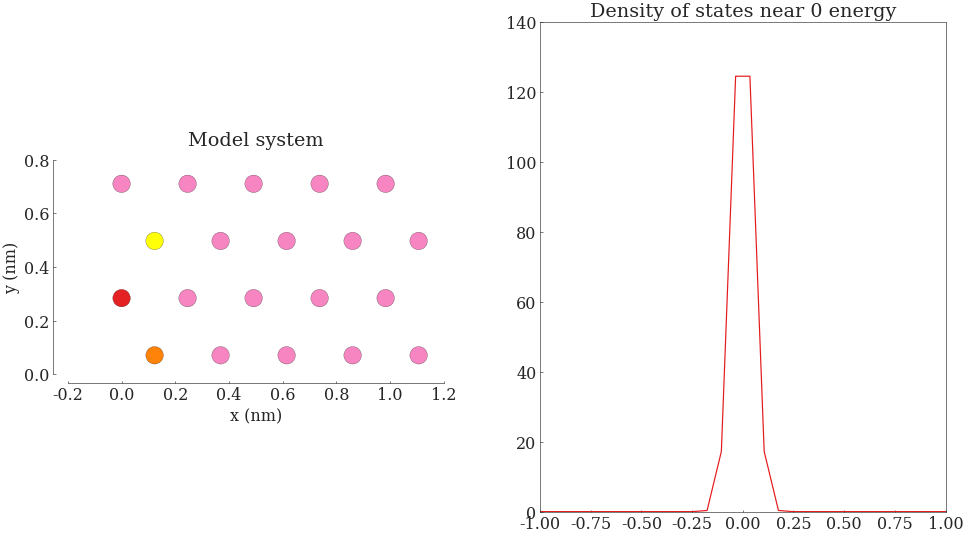

In [61]:
def vacancy():
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id=='0'] = False
        state[sub_id=='2'] = False
        state[sub_id=='4'] = False
        state[sub_id=='6'] = False
        state[sub_id=='8'] = False
        state[sub_id=='10'] = False
        state[sub_id=='12'] = False
        state[sub_id=='14'] = False
        state[sub_id=='16'] = False
        state[sub_id=='18'] = False
        state[sub_id=='20'] = False
        state[sub_id=='22'] = False
        state[sub_id=='24'] = False
        state[sub_id=='26'] = False
        state[sub_id=='28'] = False
        state[sub_id=='30'] = False
        state[sub_id=='32'] = False
        state[sub_id=='34'] = False
        state[sub_id=='36'] = False
        state[sub_id=='38'] = False
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    vacancy()
)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-7, 7, 200), broadening=0.05)  # [eV]
data=dos.data

plt.subplot(121)
model.plot()
plt.title('Model system')

plt.subplot(122)
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data)
plt.xlim(-1, 1)
print('Value of dos at 0 energy',data[100])

If there are too many vacancy, the lattice is broken!

## Conclusion of (b) & Sugestion unit cell defect distribution:

By adding hydrogen atom or substituting by nitrogen atom, the value is not changed, in fact. The value is changed significantly by making vacancies. More vacancies are not always better. There is specific the maximizing rule that the number of links between given nodes is an even number.

Value of dos at 0 energy 24.91861299594681


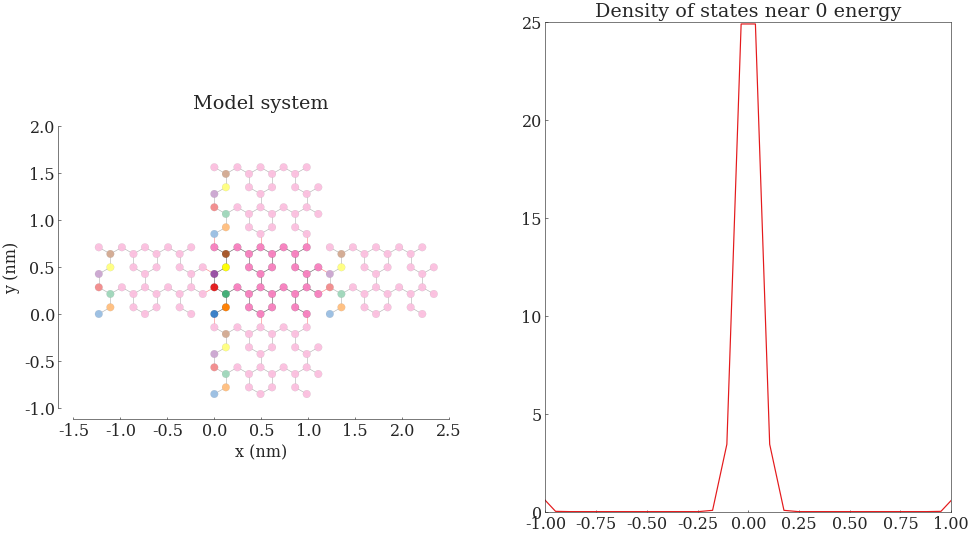

In [63]:
def vacancy():
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id=='8'] = False
        state[sub_id=='24'] = False 
        state[sub_id=='33'] = False
        
        state[sub_id=='12'] = False
        state[sub_id=='28'] = False 
        state[sub_id=='38'] = False
   
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    vacancy()
)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-7, 7, 200), broadening=0.05)  # [eV]
data=dos.data

plt.subplot(121)
model.plot()
plt.title('Model system')

plt.subplot(122)
plt.title('Density of states near 0 energy')
plt.plot(np.linspace(-7, 7, 200),data)
plt.xlim(-1, 1)
print('Value of dos at 0 energy',data[100])

Above discussions are all valid for lager unit cell model. For example, like this.

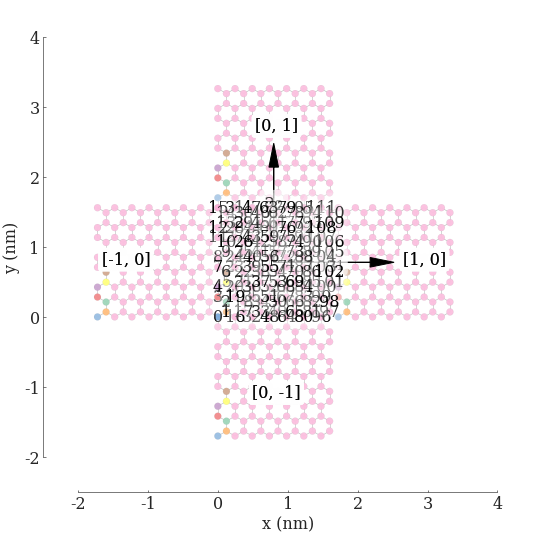

In [65]:
from math import sqrt

def graphene_sheet():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping
    
    lat = pb.Lattice(a1=[d*7*sqrt(3), 0],a2=[0,d*12])
    lat.add_sublattices(
                        ('0', [0, 0]),
                        ('1', [d*sqrt(3)/2, d/2]),
                        ('2', [d*sqrt(3)/2, d*3/2]),
                        ('3', [0, d*2]),
                        ('4', [0, d*3]),
                        ('5', [d*sqrt(3)/2,  d*7/2]),
                        ('6', [d*sqrt(3)/2,  d*9/2]),
                        ('7', [0, d*5]),
                        ('8', [0, d*6]),
                        ('9', [d*sqrt(3)/2,  d*13/2]),
                        ('10', [d*sqrt(3)/2, d*15/2]),
                        ('11', [0, d*8]),
                        ('12', [0, d*9]),
                        ('13', [d*sqrt(3)/2, d*19/2]),
                        ('14', [d*sqrt(3)/2, d*21/2]),
                        ('15', [0, d*11]),
                        
                        ('16', [1*d*sqrt(3), 0]),
                        ('17', [1*d*sqrt(3)+d*sqrt(3)/2, d/2]),
                        ('18', [1*d*sqrt(3)+d*sqrt(3)/2, d*3/2]),
                        ('19', [1*d*sqrt(3), d*2]),
                        ('20', [1*d*sqrt(3), d*3]),
                        ('21', [1*d*sqrt(3)+d*sqrt(3)/2,  d*7/2]),
                        ('22', [1*d*sqrt(3)+d*sqrt(3)/2,  d*9/2]),
                        ('23', [1*d*sqrt(3), d*5]),
                        ('24', [1*d*sqrt(3), d*6]),
                        ('25', [1*d*sqrt(3)+d*sqrt(3)/2,  d*13/2]),
                        ('26', [1*d*sqrt(3)+d*sqrt(3)/2, d*15/2]),
                        ('27', [1*d*sqrt(3), d*8]),
                        ('28', [1*d*sqrt(3), d*9]),
                        ('29', [1*d*sqrt(3)+d*sqrt(3)/2, d*19/2]),
                        ('30', [1*d*sqrt(3)+d*sqrt(3)/2, d*21/2]),
                        ('31', [1*d*sqrt(3), d*11]),
        
                        ('32', [2*d*sqrt(3), 0]),
                        ('33', [2*d*sqrt(3)+d*sqrt(3)/2, d/2]),
                        ('34', [2*d*sqrt(3)+d*sqrt(3)/2, d*3/2]),
                        ('35', [2*d*sqrt(3), d*2]),
                        ('36', [2*d*sqrt(3), d*3]),
                        ('37', [2*d*sqrt(3)+d*sqrt(3)/2,  d*7/2]),
                        ('38', [2*d*sqrt(3)+d*sqrt(3)/2,  d*9/2]),
                        ('39', [2*d*sqrt(3), d*5]),
                        ('40', [2*d*sqrt(3), d*6]),
                        ('41', [2*d*sqrt(3)+d*sqrt(3)/2,  d*13/2]),
                        ('42', [2*d*sqrt(3)+d*sqrt(3)/2, d*15/2]),
                        ('43', [2*d*sqrt(3), d*8]),
                        ('44', [2*d*sqrt(3), d*9]),
                        ('45', [2*d*sqrt(3)+d*sqrt(3)/2, d*19/2]),
                        ('46', [2*d*sqrt(3)+d*sqrt(3)/2, d*21/2]),
                        ('47', [2*d*sqrt(3), d*11]),

                        ('48', [3*d*sqrt(3), 0]),
                        ('49', [3*d*sqrt(3)+d*sqrt(3)/2, d/2]),
                        ('50', [3*d*sqrt(3)+d*sqrt(3)/2, d*3/2]),
                        ('51', [3*d*sqrt(3), d*2]),
                        ('52', [3*d*sqrt(3), d*3]),
                        ('53', [3*d*sqrt(3)+d*sqrt(3)/2,  d*7/2]),
                        ('54', [3*d*sqrt(3)+d*sqrt(3)/2,  d*9/2]),
                        ('55', [3*d*sqrt(3), d*5]),
                        ('56', [3*d*sqrt(3), d*6]),
                        ('57', [3*d*sqrt(3)+d*sqrt(3)/2,  d*13/2]),
                        ('58', [3*d*sqrt(3)+d*sqrt(3)/2, d*15/2]),
                        ('59', [3*d*sqrt(3), d*8]),
                        ('60', [3*d*sqrt(3), d*9]),
                        ('61', [3*d*sqrt(3)+d*sqrt(3)/2, d*19/2]),
                        ('62', [3*d*sqrt(3)+d*sqrt(3)/2, d*21/2]),
                        ('63', [3*d*sqrt(3), d*11]),

                        ('64', [4*d*sqrt(3), 0]),
                        ('65', [4*d*sqrt(3)+d*sqrt(3)/2, d/2]),
                        ('66', [4*d*sqrt(3)+d*sqrt(3)/2, d*3/2]),
                        ('67', [4*d*sqrt(3), d*2]),
                        ('68', [4*d*sqrt(3), d*3]),
                        ('69', [4*d*sqrt(3)+d*sqrt(3)/2,  d*7/2]),
                        ('70', [4*d*sqrt(3)+d*sqrt(3)/2,  d*9/2]),
                        ('71', [4*d*sqrt(3), d*5]),
                        ('72', [4*d*sqrt(3), d*6]),
                        ('73', [4*d*sqrt(3)+d*sqrt(3)/2,  d*13/2]),
                        ('74', [4*d*sqrt(3)+d*sqrt(3)/2, d*15/2]),
                        ('75', [4*d*sqrt(3), d*8]),
                        ('76', [4*d*sqrt(3), d*9]),
                        ('77', [4*d*sqrt(3)+d*sqrt(3)/2, d*19/2]),
                        ('78', [4*d*sqrt(3)+d*sqrt(3)/2, d*21/2]),
                        ('79', [4*d*sqrt(3), d*11]),

                        ('80', [5*d*sqrt(3), 0]),
                        ('81', [5*d*sqrt(3)+d*sqrt(3)/2, d/2]),
                        ('82', [5*d*sqrt(3)+d*sqrt(3)/2, d*3/2]),
                        ('83', [5*d*sqrt(3), d*2]),
                        ('84', [5*d*sqrt(3), d*3]),
                        ('85', [5*d*sqrt(3)+d*sqrt(3)/2,  d*7/2]),
                        ('86', [5*d*sqrt(3)+d*sqrt(3)/2,  d*9/2]),
                        ('87', [5*d*sqrt(3), d*5]),
                        ('88', [5*d*sqrt(3), d*6]),
                        ('89', [5*d*sqrt(3)+d*sqrt(3)/2,  d*13/2]),
                        ('90', [5*d*sqrt(3)+d*sqrt(3)/2, d*15/2]),
                        ('91', [5*d*sqrt(3), d*8]),
                        ('92', [5*d*sqrt(3), d*9]),
                        ('93', [5*d*sqrt(3)+d*sqrt(3)/2, d*19/2]),
                        ('94', [5*d*sqrt(3)+d*sqrt(3)/2, d*21/2]),
                        ('95', [5*d*sqrt(3), d*11]),
        
                        ('96', [6*d*sqrt(3), 0]),
                        ('97', [6*d*sqrt(3)+d*sqrt(3)/2, d/2]),
                        ('98', [6*d*sqrt(3)+d*sqrt(3)/2, d*3/2]),
                        ('99', [6*d*sqrt(3), d*2]),
                        ('100', [6*d*sqrt(3), d*3]),
                        ('101', [6*d*sqrt(3)+d*sqrt(3)/2,  d*7/2]),
                        ('102', [6*d*sqrt(3)+d*sqrt(3)/2,  d*9/2]),
                        ('103', [6*d*sqrt(3), d*5]),
                        ('104', [6*d*sqrt(3), d*6]),
                        ('105', [6*d*sqrt(3)+d*sqrt(3)/2,  d*13/2]),
                        ('106', [6*d*sqrt(3)+d*sqrt(3)/2, d*15/2]),
                        ('107', [6*d*sqrt(3), d*8]),
                        ('108', [6*d*sqrt(3), d*9]),
                        ('109', [6*d*sqrt(3)+d*sqrt(3)/2, d*19/2]),
                        ('110', [6*d*sqrt(3)+d*sqrt(3)/2, d*21/2]),
                        ('111', [6*d*sqrt(3), d*11])
                       )
    lat.register_hopping_energies({'cn':t, 'nn':t}) #change hopping later
    lat.add_hoppings(
        # inside the main cell, chain shape
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        ([0,  0], '4', '5', t),
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        ([0,  0], '7', '8', t),
        ([0,  0], '8', '9', t),
        ([0,  0], '9', '10', t),
        ([0,  0], '10', '11', t),
        ([0,  0], '11', '12', t),
        ([0,  0], '12', '13', t),
        ([0,  0], '13', '14', t),
        ([0,  0], '14', '15', t),
        
        ([0,  0], '16', '17', t),
        ([0,  0], '17', '18', t),
        ([0,  0], '18', '19', t),
        ([0,  0], '19', '20', t),
        ([0,  0], '20', '21', t),
        ([0,  0], '21', '22', t),
        ([0,  0], '22', '23', t),
        ([0,  0], '23', '24', t),
        ([0,  0], '24', '25', t),
        ([0,  0], '25', '26', t),
        ([0,  0], '26', '27', t),
        ([0,  0], '27', '28', t),
        ([0,  0], '28', '29', t),
        ([0,  0], '29', '30', t),
        ([0,  0], '30', '31', t),
        
        ([0,  0], '32', '33', t),
        ([0,  0], '33', '34', t),
        ([0,  0], '34', '35', t),
        ([0,  0], '35', '36', t),
        ([0,  0], '36', '37', t),
        ([0,  0], '37', '38', t),
        ([0,  0], '38', '39', t),
        ([0,  0], '39', '40', t),
        ([0,  0], '40', '41', t),
        ([0,  0], '41', '42', t),
        ([0,  0], '42', '43', t),
        ([0,  0], '43', '44', t),
        ([0,  0], '44', '45', t),
        ([0,  0], '45', '46', t),
        ([0,  0], '46', '47', t),
        
        ([0,  0], '48', '49', t),
        ([0,  0], '49', '50', t),
        ([0,  0], '50', '51', t),
        ([0,  0], '51', '52', t),
        ([0,  0], '52', '53', t),
        ([0,  0], '53', '54', 'cn'), #CN
        ([0,  0], '54', '55', 'nn'), #NN
        ([0,  0], '55', '56', 'nn'), #NN
        ([0,  0], '56', '57', 'nn'), #NN
        ([0,  0], '57', '58', 'cn'), #CN
        ([0,  0], '58', '59', t),
        ([0,  0], '59', '60', t),
        ([0,  0], '60', '61', t),
        ([0,  0], '61', '62', t),
        ([0,  0], '62', '63', t),
        
        ([0,  0], '64', '65', t),
        ([0,  0], '65', '66', t),
        ([0,  0], '66', '67', t),
        ([0,  0], '67', '68', t),
        ([0,  0], '68', '69', t),
        ([0,  0], '69', '70', t),
        ([0,  0], '70', '71', 'cn'), #CN
        ([0,  0], '71', '72', 'nn'), #NN
        ([0,  0], '72', '73', 'cn'), #CN
        ([0,  0], '73', '74', t),
        ([0,  0], '74', '75', t),
        ([0,  0], '75', '76', t),
        ([0,  0], '76', '77', t),
        ([0,  0], '77', '78', t),
        ([0,  0], '78', '79', t),
        
        ([0,  0], '80', '81', t),
        ([0,  0], '81', '82', t),
        ([0,  0], '82', '83', t),
        ([0,  0], '83', '84', t),
        ([0,  0], '84', '85', t),
        ([0,  0], '85', '86', t),
        ([0,  0], '86', '87', t),
        ([0,  0], '87', '88', t),
        ([0,  0], '88', '89', t),
        ([0,  0], '89', '90', t),
        ([0,  0], '90', '91', t),
        ([0,  0], '91', '92', t),
        ([0,  0], '92', '93', t),
        ([0,  0], '93', '94', t),
        ([0,  0], '94', '95', t),
        
        ([0,  0], '96', '97', t),
        ([0,  0], '97', '98', t),
        ([0,  0], '98', '99', t),
        ([0,  0], '99', '100', t),
        ([0,  0], '100', '101', t),
        ([0,  0], '101', '102', t),
        ([0,  0], '102', '103', t),
        ([0,  0], '103', '104', t),
        ([0,  0], '104', '105', t),
        ([0,  0], '105', '106', t),
        ([0,  0], '106', '107', t),
        ([0,  0], '107', '108', t),
        ([0,  0], '108', '109', t),
        ([0,  0], '109', '110', t),
        ([0,  0], '110', '111', t),        
        # inside the main cell, between chains
        ([0,  0], '1', '16', t),
        ([0,  0], '2', '19', t),
        ([0,  0], '5', '20', t),
        ([0,  0], '6', '23', t),
        ([0,  0], '9', '24', t),
        ([0,  0], '10', '27', t),
        ([0,  0], '13', '28', t),
        ([0,  0], '14', '31', t),
        
        ([0,  0], '17', '32', t),
        ([0,  0], '18', '35', t),
        ([0,  0], '21', '36', t),
        ([0,  0], '22', '39', t),
        ([0,  0], '25', '40', t),
        ([0,  0], '26', '43', t),
        ([0,  0], '29', '44', t),
        ([0,  0], '30', '47', t),
        
        ([0,  0], '33', '48', t),
        ([0,  0], '34', '51', t),
        ([0,  0], '37', '52', t),
        ([0,  0], '38', '55', 'cn'),#CN
        ([0,  0], '41', '56', 'cn'),#CN
        ([0,  0], '42', '59', t),
        ([0,  0], '45', '60', t),
        ([0,  0], '46', '63', t),
        
        ([0,  0], '49', '64', t),
        ([0,  0], '50', '67', t),
        ([0,  0], '53', '68', t),
        ([0,  0], '54', '71', 'nn'),#NN
        ([0,  0], '57', '72', 'nn'),#NN
        ([0,  0], '58', '75', t),
        ([0,  0], '61', '76', t),
        ([0,  0], '62', '79', t),
        
        ([0,  0], '65', '80', t),
        ([0,  0], '66', '83', t),
        ([0,  0], '69', '84', t),
        ([0,  0], '70', '87', t),
        ([0,  0], '73', '88', t),
        ([0,  0], '74', '91', t),
        ([0,  0], '77', '92', t),
        ([0,  0], '78', '95', t),
        
        ([0,  0], '81', '96', t),
        ([0,  0], '82', '99', t),
        ([0,  0], '85', '100', t),
        ([0,  0], '86', '103', t),
        ([0,  0], '89', '104', t),
        ([0,  0], '90', '107', t),
        ([0,  0], '93', '108', t),
        ([0,  0], '94', '111', t),
        
        # between neighboring cells, x directional
        ([-1, 0], '0', '97', t),
        ([-1, 0], '3', '98', t),
        ([-1, 0], '4', '101', t),
        ([-1, 0], '7', '102', t),
        ([-1, 0], '8', '105', t),
        ([-1, 0], '11', '106', t),
        ([-1, 0], '12', '109', t),
        ([-1, 0], '15', '110', t),
        # between neighboring cells, y directional
        ([0, -1], '0', '15', t),
        ([0, -1], '16', '31', t),
        ([0, -1], '32', '47', t),
        ([0, -1], '48', '63', t),
        ([0, -1], '64', '79', t),
        ([0, -1], '80', '95', t),
        ([0, -1], '96', '111', t)
    )
    return lat

lattice = graphene_sheet()
lattice.plot()
plt.show()

Value of dos at 0 energy 99.67460722744867


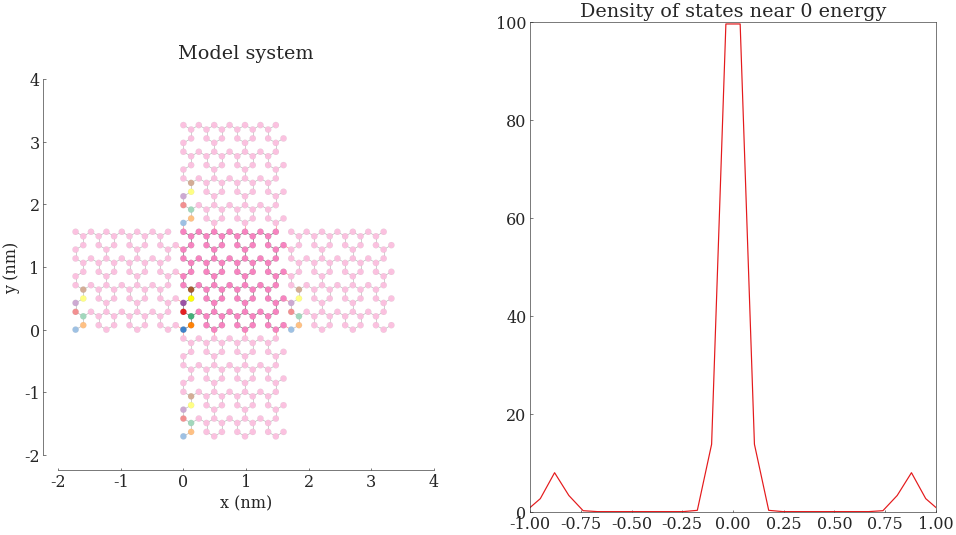

In [66]:
def vacancy():
    @pb.site_state_modifier
    def modifier(state, sub_id):
        state[sub_id=='16'] = False         
        state[sub_id=='48'] = False
        state[sub_id=='80'] = False
        
        state[sub_id=='20'] = False         
        state[sub_id=='52'] = False
        state[sub_id=='84'] = False
        
        state[sub_id=='24'] = False         
        state[sub_id=='56'] = False
        state[sub_id=='88'] = False
        
        state[sub_id=='28'] = False         
        state[sub_id=='60'] = False
        state[sub_id=='92'] = False
        
        state[sub_id=='98'] = False         
        state[sub_id=='102'] = False
        state[sub_id=='106'] = False
        state[sub_id=='110'] = False
        
        
        return state
    return modifier
model = pb.Model(
    graphene_sheet(),
    pb.translational_symmetry(a1=True, a2= True),
    vacancy()
)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-7, 7, 200), broadening=0.05)  # [eV]
data=dos.data

plt.subplot(121)
model.plot()
plt.title('Model system')

plt.subplot(122)
#plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states near 0 energy')
#plt.ylim(-0.5, 0.5)
plt.plot(np.linspace(-7, 7, 200),data)
plt.xlim(-1, 1)
print('Value of dos at 0 energy',data[100])

# Part-(c): DOS for graphene sheet through large cell model.

Text(0.5, 1.0, 'Model system')

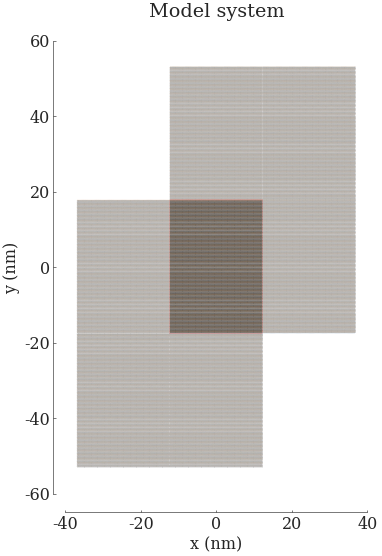

In [74]:
size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    #vacancy(position=[0, 0], radius=5*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
model.plot()
plt.title('Model system')

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
26.392234802246094


Text(0.5, 1.0, 'DOS near the 0 energy')

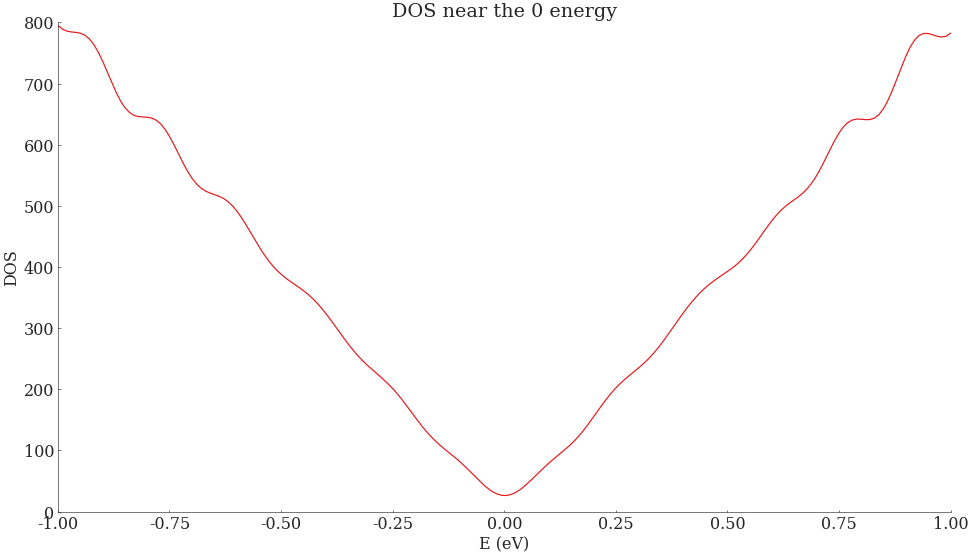

In [75]:
kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
dos.plot()
print(dos.data[100])
plt.title('DOS near the 0 energy')

Of course, the value at 0 is extremly small

## Hole defect

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
27.750654220581055


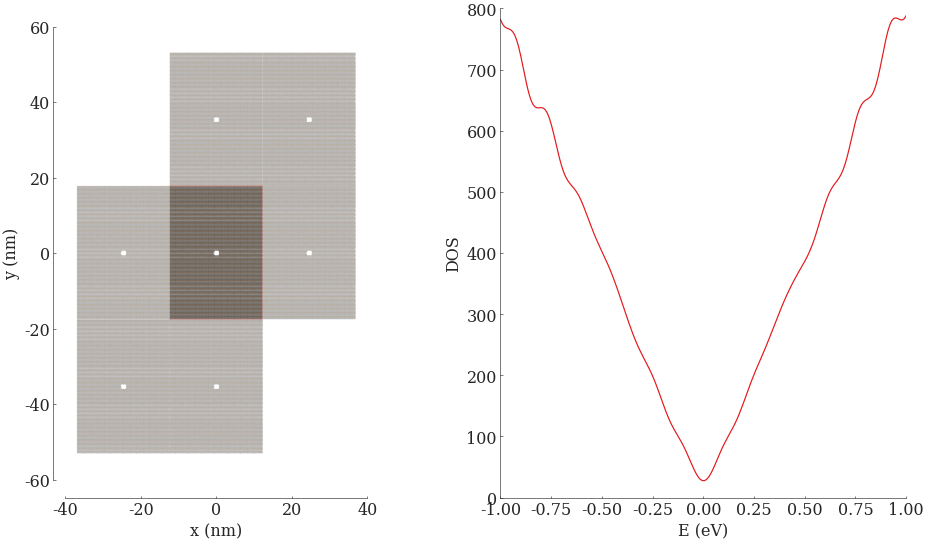

In [76]:
def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy(position=[0, 0], radius=5*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
57.86277389526367


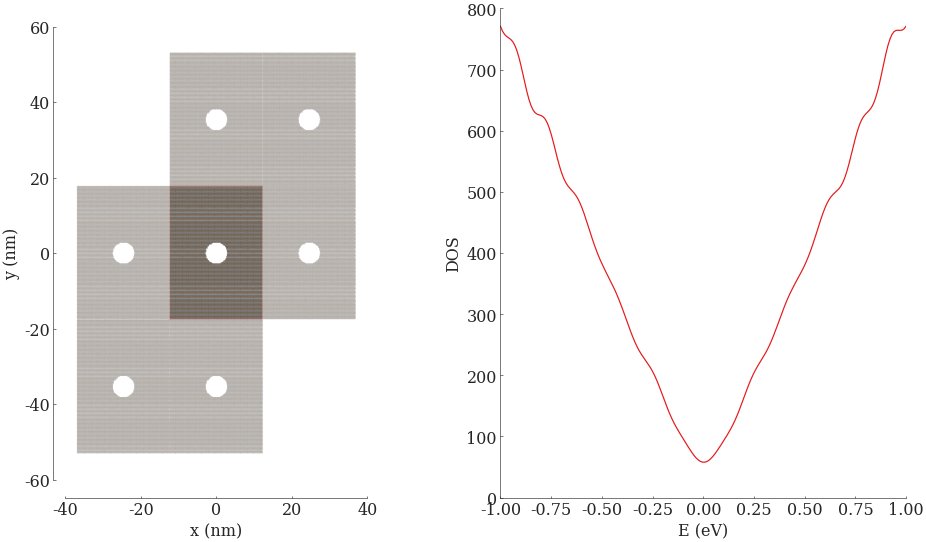

In [77]:
def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy(position=[0, 0], radius=20*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

The larger hole is better.

## Line defect

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
42.07976531982422


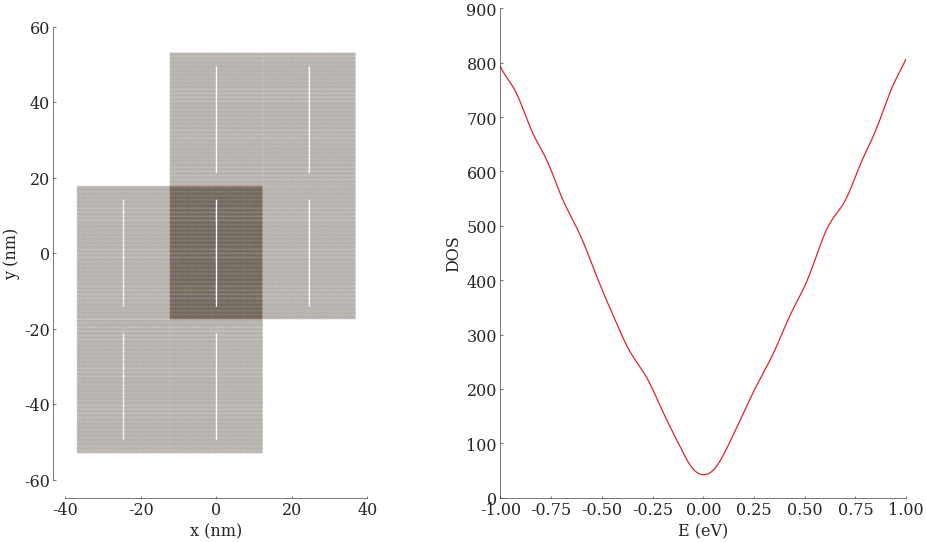

In [78]:
def vacancy(position, dx, dy): #if put dx=size/4, then the unit cell  is disconnected.
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(abs(x-x0)<dx, abs(y-y0)<dy)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy([0, 0], graphene.a, 40*(5/2)*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

The vertical line defect is not good.

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
872.5497436523438


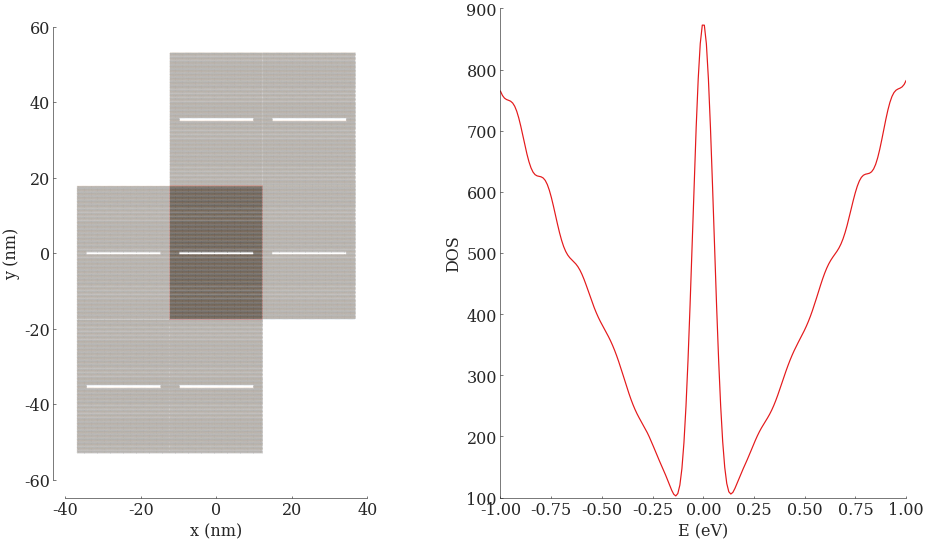

In [79]:
def vacancy(position, dx, dy):  #if put dx=size/4, then the unit cell  is disconnected.
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(abs(x-x0)<dx, abs(y-y0)<dy)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy([0, 0], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

The horizon line defect is so good!

This result is explained by the fact that getted at part(a). The zigzag edge is very effective, so the horizontal shape has large value at 0.

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
1685.7001953125


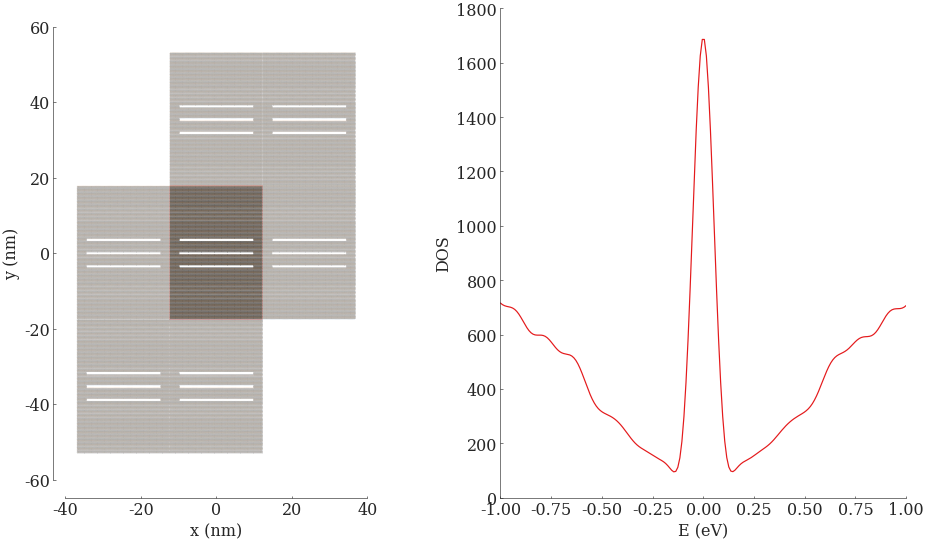

In [90]:
from pybinding.repository import graphene
from math import sqrt, pi

def vacancy(position, dx, dy):  #if put dx=size/4, then the unit cell  is disconnected.
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(abs(x-x0)<dx, abs(y-y0)<dy)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy([0, 10*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 0], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -10*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

If there are more number of horizon lines, the value is larger, ordinary.

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
3016.600341796875


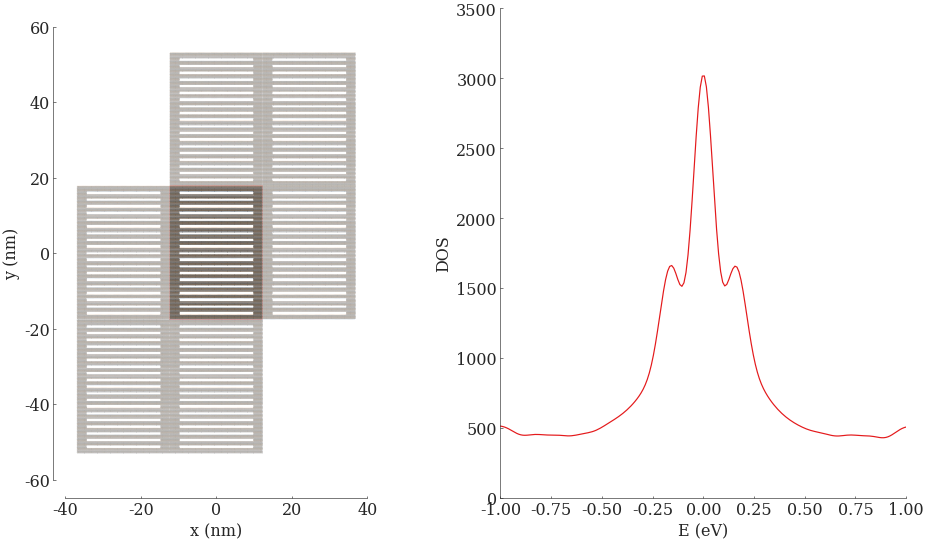

In [88]:
def vacancy(position, dx, dy):  #if put dx=size/4, then the unit cell  is disconnected.
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(abs(x-x0)<dx, abs(y-y0)<dy)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy([0, 45*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 40*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 35*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 30*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 25*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 20*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 15*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 10*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 5*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 0], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -45*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -40*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -35*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -30*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -25*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -20*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -15*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -10*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -5*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
4861.3173828125


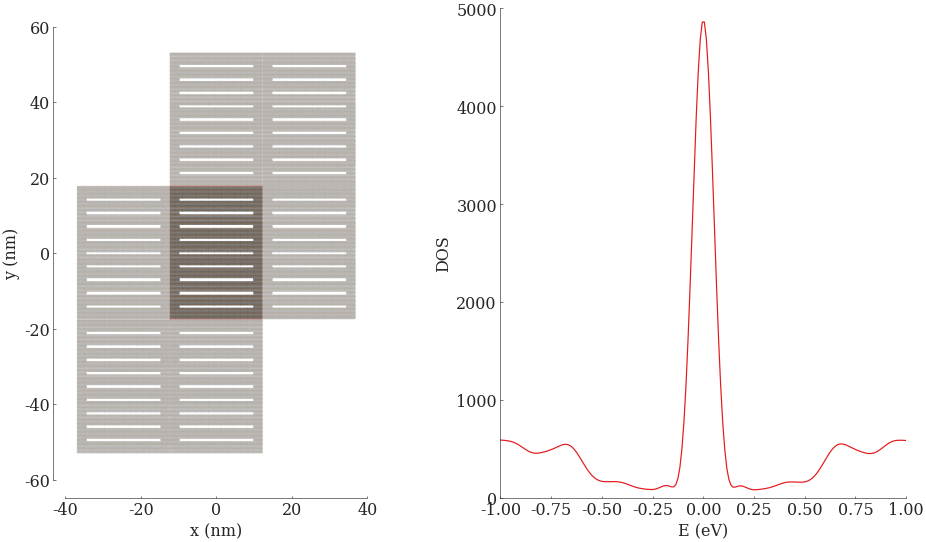

In [89]:
from pybinding.repository import graphene
from math import sqrt, pi

def vacancy(position, dx, dy):  #if put dx=size/4, then the unit cell  is disconnected.
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(abs(x-x0)<dx, abs(y-y0)<dy)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy([0, 40*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 30*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 20*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 10*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 0], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -10*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -20*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -30*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -40*(5/2)*graphene.a/sqrt(3)], 40*graphene.a, (5/2)*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

However, many horizon lines are not always good. This case has smaller lines than above case, but has the larger value.

This result is explained by the fact that getted at part(b). The spacing between lines should be even times of cell size!

## Conclusion: My final ideal model for maximizing value of DOS at 0 energy

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00
12729.0263671875


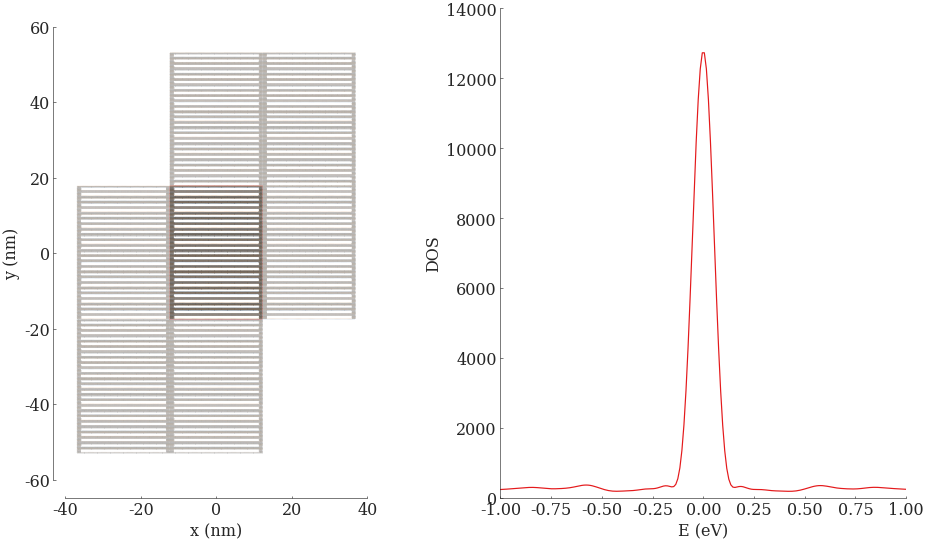

In [92]:
def vacancy(position, dx, dy):  #if put dx=size/4, then the unit cell  is disconnected.
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[np.logical_and(abs(x-x0)<dx, abs(y-y0)<dy)] = False
        return state
    return modifier

size=200
model = pb.Model(
    graphene.monolayer_4atom(),
    pb.rectangle(size*graphene.a, size*(5/2)*graphene.a/sqrt(3)),
    vacancy([0, 48*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 44*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 40*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 36*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 32*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 28*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 24*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 20*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 16*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 12*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 8*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 4*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, 0], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -48*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -44*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -40*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -36*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -32*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -28*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -24*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -20*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -16*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -12*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -8*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    vacancy([0, -4*(5/2)*graphene.a/sqrt(3)], 46*graphene.a, (5/2)*graphene.a/sqrt(3)),
    pb.translational_symmetry(a1=(size/2)*graphene.a, a2= (size/2)*(5/2)*graphene.a/sqrt(3))
)
plt.subplot(121)
model.plot()

kpm = pb.kpm(model)
dos = kpm.calc_dos(energy=np.linspace(-1, 1, 200), broadening=0.05, num_random=100)
plt.subplot(122)
dos.plot()
print(dos.data[100])

This model has very large value at 0!